# Exercise 1. Simple Quantum Adder

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from math import pi

<div class="alert alert-block alert-success">

**Readme**  
    
There are 9 questions (marked in Green) in total in this Jupyter notebook. These questions will teach you how to build quantum circuits and we will explore both classical addition and quantum addition using quantum circuits.
</div>

## 1.1 Introduction to Quantum Circuit
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Quantum gates often represent rotations on the Bloch sphere. Let's take a look at some of the popular quantum gates.



### X gate 
The X-gate is represented by the Pauli-X matrix:

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

In [ ]:
x_gate = QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

The Aer library provides various quantum backends to evaluate the quantum state. Here, we use the Statevector simulator to visualize the quantum state on ideal quantum computer. 

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Hadamard gate (H gate)
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

In [ ]:
# Let's do an H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

In [ ]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(h_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Phase gate (P gate)

The phase gate is a single-qubit rotation gate about the Z axis. It is a crucial quantum gate generating the relative phase between $|0\rangle$ and $|1\rangle$. It can be implemented virtually in hardware via framechanges (i.e. at zero error and duration). Unlike the Hadamard and X gate, the phase gate also takes in a rotation angle $\lambda$ (in radians).

$P(\lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda} \\
\end{pmatrix}$

Note, the phase gate is a generalized gate for several commonly used quantum gates:

$P(\lambda =\pi) = Z\\P(\lambda =\pi/2)= S\\P(\lambda =\pi/4)= T$


In [ ]:
# To make the problem more interesting, let's do an P-gate on a |+> state
p_gate = QuantumCircuit(1)
p_gate.h(0)
p_gate.p(pi/2, 0)
p_gate.draw(output='mpl')

In [ ]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(p_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

In [ ]:
array_to_latex(result)

### Controlled-NOT gate (CX, CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

Note: Qiskit numbers the bits in a string from right to left.

In [ ]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

Notice in the circuit above, the 0th qubit is indicated by $q_0$ and 1st qubit is indicated by $q_1$.

In [ ]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(cx_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

<div class="alert alert-block alert-success">

**Q1.1 Building your first quantum circuit (1 pt)**  
    
Build a quantum circuit that applies CX gate on $|01\rangle$, with control on the 0th qubit. Pay attention to the quantum state of qubit 1.   
</div>

In [ ]:
circuit = QuantumCircuit(2)
##### ==================================
# Write your solution in here.


##### ==================================
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result().get_statevector()
plot_bloch_multivector(result)

<div class="alert alert-block alert-success">

**Q1.2 Building your second quantum circuit (1 pt)**  
    
Build a quantum circuit that applies CX gate on $|01\rangle$, with control on the 0th qubit. Pay attention to the quantum state of qubit 1.   
</div>

In [ ]:
circuit = QuantumCircuit(2)
##### ==================================
# Write your solution in here.


##### ==================================
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result().get_statevector()
plot_bloch_multivector(result)

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. Convince yourself that the matrix dimension is 8.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

In [ ]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## 1.2 Classical Addition using Quantum Circuit

Addition is one of the oldest computation and it has many implementations. In the classical computer, the integers are represented as binary numbers (or bit strings). For example, 

$ 2 = 10 $   
$ 5 = 101 $   
$ 10 = 1010 $   

By encoding integers as sequence of 0s and 1s, it makes a perfect application in quantum computing. In this exercise, we will look at the implementation of classical addition on the quantum circuit. In particular, we consider two nonnegative integers $a$ and $b$, whose values can be either 0 or 1.

On the quantum circuit, we can represent them as quantum states $|a\rangle$ and $|b\rangle$, and build a two-qubit circuit for quantum addition.

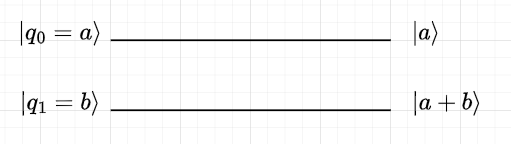

<div class="alert alert-block alert-success">

**Q1.3 Build your integer encoding function (1 pt)**  
    
Before we build an addition algorithm, it is important to build an integer encoding function on the circuit. Here, Python functions are particularly useful. For simplicity, we restrict integers to either 0 or 1. The following function returns the quantum circuit with the encoded integer on the qubit.
</div>

In [ ]:
def encode_integer(circuit, qubit, integer):
    ##### ==================================
    # Write your solution in here.
    
    
    ##### ==================================
    return circuit

Binary addition follows the truth table as follows:
| a        | b       | a+b     |
|:--------:|:-------:|:-------:|
| 0        |      0  |      0  |
| 1        |      0  |      1  |
| 0        |      1  |      1  |
| 1        |      1  |      0  |

<div class="alert alert-block alert-success">

**Q1.4 Build your classical addition algorithm on quantum circuit (1 pt)**  
    
With the encoding function, we can now write the classical addition algorithm using quantum circuit. Use the gates that you learned in this notebook. When you finish, play with values of $a$ and $b$ and convince yourself that your function works for any combinations of $a$ and $b$.
</div>

In [ ]:
def classical_add(a, b):
    assert a in [0, 1]
    assert b in [0, 1]
    circuit = QuantumCircuit(2)
    ##### ==================================
    # Write your solution in here.

        
    ##### ==================================
    return circuit

# You may want to the following code to test your results
this_circ = classical_add(a=0, b=1)
backend = Aer.get_backend('statevector_simulator')
result = execute(this_circ, backend).result().get_statevector()
plot_bloch_multivector(result)

However, in reality, addition is more complicated, as we need to take carry into consideration as well, the sum is

$s = (a+b)+carry$

We would need in this case three qubits,

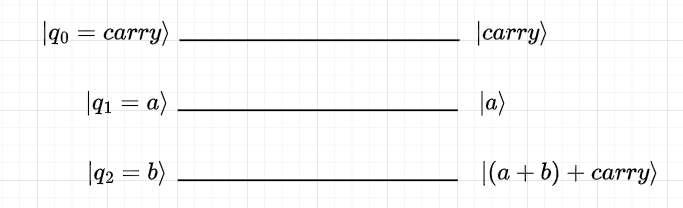

<div class="alert alert-block alert-success">

**Q1.5 Building your classical addition algorithm with carry (1 pt)**  
    
Now build your classical addition algorithm with carry. Convince yourself that your algorithm works for any combination of $a$, $b$, and $c$.
</div>

In [ ]:
def classical_add_with_carry(a, b, carry):
    assert a in [0, 1]
    assert b in [0, 1]
    assert carry in [0, 1]
    circuit = QuantumCircuit(3)
    ##### ==================================
    # Write your solution in here.
    
    
    ##### ==================================
    return circuit

# You may want to the following code to test your results
this_circ = classical_add_with_carry(a=1, b=0, carry=1)
backend = Aer.get_backend('statevector_simulator')
result = execute(this_circ, backend).result().get_statevector()
plot_bloch_multivector(result)

For our exercise, we will stop here. In real application, one would also consider how to obtain the new carry, and move onto higher bit of signifance. We will leave that for another time.

## 1.3 Quantum Addition using Quantum Circuit

In case you may have wondered, we have used the word "Classical addition" throughout Section 1.2. It is because we have treated quantum addition in the classical way. In quantum arithmetic world, researchers found that it is more efficient to encode binary bits as relative quantum phases, i.e., in the transverse plane (the x-y plane) of the Bloch sphere. In this way, addition of integer is converted to addition of phases where carries can be manageabled much more conveniently. Quantum addition also allows for circuit parallelization and approximation that is crucial when the problem size increases.

In the following exercise, we will look at the quantum addition algorithm applied to two 1-bit integers $a$ and $b$ as before. The basic idea is as follows:

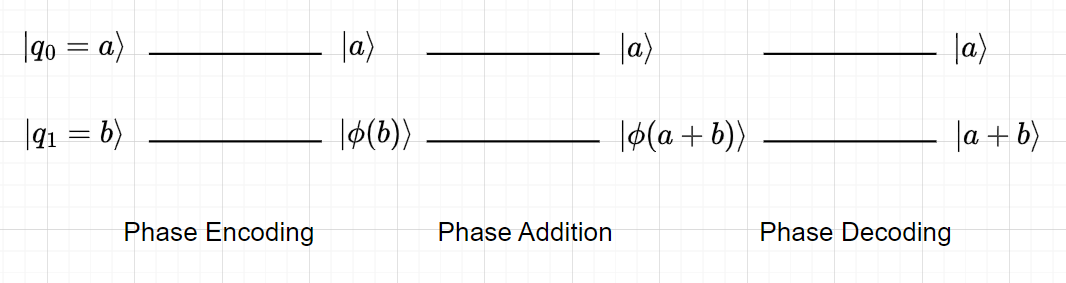

The algorithm is divided into three parts: 

(a) Quantum phase encoding   
(b) Phase addition   
(c) Quantum phase decoding   

We look at the phase encoding part first. 

<div class="alert alert-block alert-success">

**Q1.6 Building your single-qubit phase encoding function (1 pt)**  

For the single qubit state $|b\rangle$, we want to encode according to the mapping: $|0\rangle \rightarrow |+\rangle$, $|1\rangle \rightarrow |-\rangle$. What quantum gate or gates should you use to achieve this? Write your function below.
</div>


In [ ]:
def encode_integer_to_phase(circuit, qubit):
    ##### ==================================
    # Write your solution in here. Remember, before encoding to phases, 
    # your integers are already encoded as quantum state |0> and |1>
    
    
    ##### ==================================
    return circuit

In the quantum phase addition part, we want to add the quantum phase of $|a\rangle$ to $|\phi(b)\rangle$ without modifying the state $|a\rangle$. As you can imagine, this type of operation is best achieved using a controlled gate. Speaking of quantum phases, the most intuitive gate to use is the controlled-phase gate or CP-gate. In Qiskit, you can use "circuit.cp(theta, control_qubit, target_qubit)" to apply a CP-gate with an angle of theta (in radians). Since the phase between $|+\rangle$ and $|-\rangle$ is $\pi$, we should rotate an angle of $\pi$, to make the addition on equal footing.

<div class="alert alert-block alert-success">

**Q1.7 Building your phase addition function (1 pt)**  
Write a phase addition function to add the phase of incoming integer state $|a\rangle$ to recipient state $|\phi(b)\rangle$.    
</div>


In [ ]:
def phase_addition(circuit, incoming_qubit, recipient_qubit):
    ##### ==================================
    # Write your solution in here.
    
    
    ##### ==================================
    return circuit

# You may want to the following code to test your results
a = 0; b = 1;
this_circ = QuantumCircuit(2)
this_circ = encode_integer(this_circ, 0, a)
this_circ = encode_integer(this_circ, 1, b)
this_circ = encode_integer_to_phase(this_circ, 1)
this_circ = phase_addition(this_circ, 0, 1)
backend = Aer.get_backend('statevector_simulator')
result = execute(this_circ, backend).result().get_statevector()
plot_bloch_multivector(result)

<div class="alert alert-block alert-success">

**Q1.8 Building your phase decoding function (1 pt)**  
Decoding in quantum computing is easy as all quantum operations are reversible. Write your phase decoding function, which is the reverse of your encoding function.
</div>


In [ ]:
def decode_phase_to_integer(circuit, qubit):
    ##### ==================================
    # Write your solution in here. 

    
    ##### ==================================
    return circuit

<div class="alert alert-block alert-success">

**Q1.9 Building your final quantum addition algorithm function (1 pt)**  
The floor is yours.
</div>


In [ ]:
def quantum_add(a, b):
    assert a in [0, 1]
    assert b in [0, 1]
    circuit = QuantumCircuit(2)
    ##### ==================================
    # Write your solution in here.
    
    
    ##### ==================================
    return circuit

# You may want to the following code to test your results
this_circ = quantum_add(a=1, b=0)
backend = Aer.get_backend('statevector_simulator')
result = execute(this_circ, backend).result().get_statevector()
plot_bloch_multivector(result)

<div class="alert alert-block alert-success">

**Submission instructions**  
    
When you are ready, please run the following cells and email your Jupyter notebooks to meijian.li@usc.es
</div>

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

<div class="alert alert-block alert-success">

**Summary**  
    
In this Jupyter notebook, we learned to build quantum circuits and visualize results on Bloch sphere. We explored classical addition algorithm and quantum addition algorithms using circuits.
    
The quantum additoin algorithms really shines when the problem scales, allowing for parallelization and approximation. The encoding and decoding parts that we used are the one-qubit special case of the Quantum Fourier Transform and its inverse, whose applications are everywhere in almost all quantum algorithms. Its asymptotics can be even improved with Approximated Quantum Fourier Transform.
    
For more interested readers, learn more about quantum addition and quantum arithmetics at this two papers
* Draper, [Addition on a Quantum Computer](https://arxiv.org/abs/quant-ph/0008033)
* Basili, Qian, Tang, et. al., [Performance Evaluations of Noisy Approximate Quantum Fourier Arithmetic](https://arxiv.org/abs/2112.09349)     
</div>